#Descrição do projeto

Construção de um algoritmo capaz de estimar o consumo de cerveja, utilizando o [dataset](https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo) de consumo de cerveja na cidade de São Paulo.

Esse projeto passou pelas seguintes etapas:

- Importação os dados e criação do Dataframe
- Realização da limpeza e manipulação dos dados
- Realização de um EDA
- Treinamento de um modelo de regressão múltipla
- Tratamento e transformação do dados
- Otimização do modelo


### Start: Importando Bibliotecas e CSV

In [ ]:
# Importação das bibliotecas

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Pré-processamento dos dados
from sklearn.preprocessing import MinMaxScaler,StandardScaler #Ref: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

#Baixar car data.csv
from google.colab import files
upload = files.upload()


Saving Consumo_cerveja.csv to Consumo_cerveja.csv


### 1 Criando o dataframe

Renomerar as colunas para facilitar o coding

In [ ]:
# Lendo o nosso dataset
df = pd.read_csv("/content/Consumo_cerveja.csv")
df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [ ]:

# Renomeando as colunas para padronização e facilitação do código
columns = ['data','temp_med','temp_min','temp_max','precipitacao','fimsemana','consumo']
df.columns = columns

# Observando os 5 primeiros valores
df.head()

,data,temp_med,temp_min,temp_max,precipitacao,fimsemana,consumo
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


### 2 Análise Inicial

#### Informações gerais
- Número de dados
- Número de atributos
- Valores ausentes por coluna

In [ ]:
# Vamos ver algumas informações gerais sobre os dados:

print('Informações sobre o dataset: \n')
print('Número de dados: \t {}\n'.format(df.shape[0]))
print('Número de colunas: \t {}\n'.format(df.shape[1]))
print('Valores ausentes por coluna: \n{}\n'.format(df.isnull().sum()))
df.info()

Informações sobre o dataset: 

Número de dados: 	 941

Número de colunas: 	 7

Valores ausentes por coluna: 
data            576
temp_med        576
temp_min        576
temp_max        576
precipitacao    576
fimsemana       576
consumo         576
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   data          365 non-null    object 
 1   temp_med      365 non-null    object 
 2   temp_min      365 non-null    object 
 3   temp_max      365 non-null    object 
 4   precipitacao  365 non-null    object 
 5   fimsemana     365 non-null    float64
 6   consumo       365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB


### 3  Data Cleaning

#### Valores Ausentes

In [ ]:
df.tail(5)

,data,temp_med,temp_min,temp_max,precipitacao,fimsemana,consumo
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_clean = df.copy()
df_clean.dropna(axis=0,inplace=True)
df_clean.tail(3)

,data,temp_med,temp_min,temp_max,precipitacao,fimsemana,consumo
362,2015-12-29,"21,68","20,3","24,1","10,3",0.0,22.309
363,2015-12-30,"21,38","19,3","22,4","6,3",0.0,20.467
364,2015-12-31,"24,76","20,2",29,0,0.0,22.446


#### Converter dados corretamente

In [ ]:
# Dtype = object -> Formato string
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   data          365 non-null    object 
 1   temp_med      365 non-null    object 
 2   temp_min      365 non-null    object 
 3   temp_max      365 non-null    object 
 4   precipitacao  365 non-null    object 
 5   fimsemana     365 non-null    float64
 6   consumo       365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 22.8+ KB


In [ ]:
# Transformação da data para o formato datetime
df_clean['data'] = pd.to_datetime(df_clean['data'], format="%Y-%m-%d")

# Transformação dos dados para tipo float
df_clean['temp_med']     = df_clean['temp_med'].str.replace(',','.').astype(float)
df_clean['temp_min']     = df_clean['temp_min'].str.replace(',','.').astype(float)
df_clean['temp_max']     = df_clean['temp_max'].str.replace(',','.').astype(float)
df_clean['precipitacao'] = df_clean['precipitacao'].str.replace(',','.').astype(float)

# - Outra forma - Utilizar no começo
# df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/Portfolio/Consumo_cerveja.csv",decimal=",")

# Transformação dos dados para tipo int
df_clean['fimsemana'] = df_clean['fimsemana'].astype(int)

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   data          365 non-null    datetime64[ns]
 1   temp_med      365 non-null    float64       
 2   temp_min      365 non-null    float64       
 3   temp_max      365 non-null    float64       
 4   precipitacao  365 non-null    float64       
 5   fimsemana     365 non-null    int64         
 6   consumo       365 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 22.8 KB


### 4 EDA

#### Describe

In [ ]:
display(df_clean.describe(include='all'))

,data,temp_med,temp_min,temp_max,precipitacao,fimsemana,consumo
count,365,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
unique,365,NaN,NaN,NaN,NaN,NaN,NaN
top,2015-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
first,2015-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,2015-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,21.226356,17.461370,26.611507,5.196712,0.284932,25.401367
std,NaN,3.180108,2.826185,4.317366,12.417844,0.452001,4.399143
min,NaN,12.900000,10.600000,14.500000,0.000000,0.000000,14.343000
25%,NaN,19.020000,15.300000,23.800000,0.000000,0.000000,22.008000


#### Gráfico de consumo x tempo

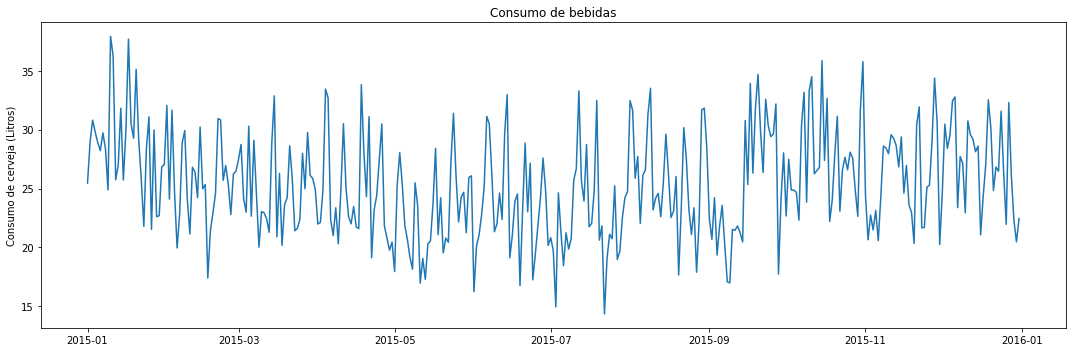

In [ ]:
plt.figure(figsize=(15,5))

color_blue = 'cornflowerblue'
# Visualização do consumo durante todo o ano
plt.plot_date(x='data',y='consumo',data=df_clean,fmt='-');
plt.title('Consumo de bebidas')
plt.ylabel('Consumo de cerveja (Litros)')

plt.tight_layout()
plt.show()

#### Gráfico mostrando as flutuações das variáveis ao longo do tempo

O ideal é conseguir visualizar estas 4:
- temp_max
- temp_med
- temp_min
- consumo

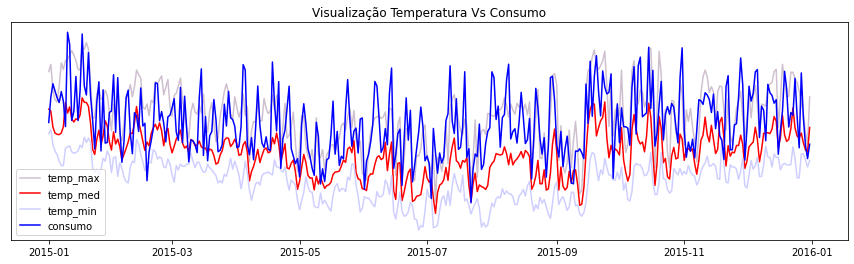

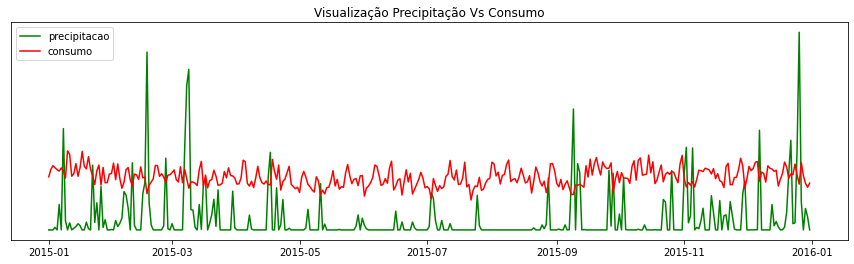

In [ ]:
plt.figure(figsize=(15,4))
plt.gca().axes.get_yaxis().set_visible(False)
plt.plot_date(x='data',y='temp_max',data=df_clean,fmt='-',c='#CFC0D0');
plt.plot_date(x='data',y='temp_med',data=df_clean,fmt='-',c='r');
plt.plot_date(x='data',y='temp_min',data=df_clean,fmt='-',c='#CFCFFF');
plt.plot_date(x='data',y='consumo',data=df_clean,fmt='-',c='#0000FF');
plt.title("Visualização Temperatura Vs Consumo")
plt.legend()



plt.figure(figsize=(15,4))
plt.plot_date(x='data',y='precipitacao',data=df_clean,fmt='-',c='g');
plt.plot_date(x='data',y='consumo',data=df_clean,fmt='-',c='r');
plt.title("Visualização Precipitação Vs Consumo")
plt.gca().axes.get_yaxis().set_visible(False)
plt.legend()
plt.show()

#### Gráfico de correlação

consumo         1.000000
temp_max        0.642672
temp_med        0.574615
fimsemana       0.505981
temp_min        0.392509
precipitacao   -0.193784
Name: consumo, dtype: float64


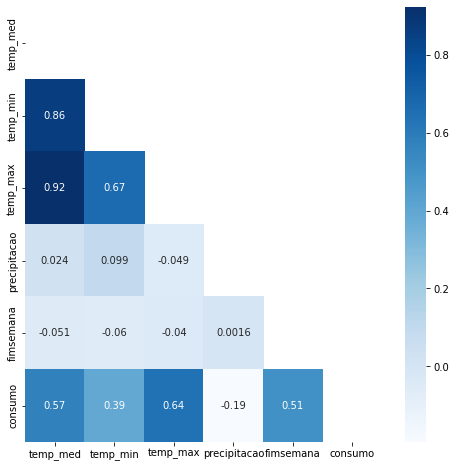

In [ ]:
print(df_clean.corr()['consumo'].sort_values(ascending = False) )

correlation = df_clean.corr()

f, ax = plt.subplots(figsize=(8, 8))

# Cria uma máscara para camuflar a parte de cima do mapa

mask = np.triu(np.ones_like(correlation,dtype=bool))

# Plot do mapa de calor

sns.heatmap(correlation,cmap='Blues',mask=mask, square=False,annot=True);

### 5 Separando conjunto de Treino e Teste

In [ ]:
# Separando o conjunto de dados em variáveis e target

X = df_clean[['data', 'temp_med', 'temp_min', 'temp_max', 'precipitacao', 'fimsemana']]
y = df_clean[['consumo']]

# Criação da amostra para treino e testes

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=75)

In [ ]:
X_train.head()

,data,temp_med,temp_min,temp_max,precipitacao,fimsemana
227,2015-08-16,20.56,16.2,27.2,0.0,1
7,2015-01-08,24.90,19.5,32.8,48.6,0
339,2015-12-06,23.12,20.6,28.0,0.1,1
354,2015-12-21,23.12,19.6,29.1,27.2,0
191,2015-07-11,17.46,16.0,19.8,0.0,1


### 6 Criando os transformadores e transformar os dados (Separado)

A coluna **data** é apenas um indíce que nos auxilia a visualizar a evolução do consumo ao longo do tempo, porém ela não é utilizada nos transformadores e nem no treinamento / validação do modelo.

#### Criar os transformadores

In [ ]:
# Chamar os modelos de transformação
min_max = MinMaxScaler()
norm = StandardScaler()

#### Treinar o StandardScaler()

In [ ]:
X_train_norm = X_train.copy()
X_test_norm = X_test.copy()
for i in X_train_norm.columns:
  if i == 'data':
    pass
  else: 
    X_train_norm[i] = norm.fit_transform(X_train_norm[i].values.reshape(-1,1))
    X_test_norm[i] = norm.transform(X_test_norm[i].values.reshape(-1,1))

X_train_norm.head()


,data,temp_med,temp_min,temp_max,precipitacao,fimsemana
227,2015-08-16,-0.278386,-0.512593,0.084390,-0.425067,1.586843
7,2015-01-08,1.116713,0.680485,1.408720,3.231927,-0.630182
339,2015-12-06,0.544529,1.078178,0.273580,-0.417542,1.586843
354,2015-12-21,0.544529,0.716639,0.533717,1.621646,-0.630182
191,2015-07-11,-1.274884,-0.584900,-1.665617,-0.425067,1.586843


#### Treinar o MinMaxScaler()

In [ ]:
X_train_min_max = X_train.copy()
X_test_min_max = X_test.copy()
for i in X_train_min_max.columns:
  if i == 'data':
    pass
  else:
    X_train_min_max[i] = min_max.fit_transform(X_train_min_max[i].values.reshape(-1,1))
    X_test_min_max[i] = min_max.transform(X_test_min_max[i].values.reshape(-1,1))

X_train_min_max.head()


,data,temp_med,temp_min,temp_max,precipitacao,fimsemana
227,2015-08-16,0.479950,0.385185,0.596244,0.000000,1.0
7,2015-01-08,0.751880,0.629630,0.859155,0.512658,0.0
339,2015-12-06,0.640351,0.711111,0.633803,0.001055,1.0
354,2015-12-21,0.640351,0.637037,0.685446,0.286920,0.0
191,2015-07-11,0.285714,0.370370,0.248826,0.000000,1.0


### 7 Treinando e validando o modelo para os dados limpos (Sem transformação)

Lembrar de excluir a coluna de data para treinar o modelo

In [ ]:
# Chamar o modelo
LinReg = LinearRegression()

# Treinar o modelo
LinReg.fit(X_train.iloc[:,1:],y_train,)

# Predizer os valores de teste
y_pred = LinReg.predict(X_test.iloc[:,1:])


# Calcular as métricas do modelo
print("Fórmula: y = {} {} x".format(LinReg.intercept_,LinReg.coef_[0]))
print("MSE: {}".format(metrics.mean_absolute_error(y_test,y_pred)))
print("RMSE: {}".format(metrics.mean_squared_error(y_test,y_pred)))
print("R²: {}".format(metrics.r2_score(y_test,y_pred)))


Fórmula: y = [6.16138335] [ 0.05198575 -0.03504732  0.6617024  -0.05541184  5.18728834] x
MSE: 1.9247425150069806
RMSE: 4.955697851338491
R²: 0.7035226802685473


### 8 Treinando e validando o modelo para os dados com MinMaxScaler

Lembrar de excluir a coluna de data para treinar o modelo

In [ ]:
# Chamar o modelo
LinReg_mim_max = LinearRegression()

# Treinar o modelo
LinReg_mim_max.fit(X_train_min_max.iloc[:,1:],y_train)

# Predizer os valores de teste
y_pred = LinReg_mim_max.predict(X_test_min_max.iloc[:,1:])


# Calcular as métricas do modelo
print("Fórmula: y = {} {} x".format(LinReg_mim_max.intercept_,LinReg_mim_max.coef_[0]))
print("MSE: {}".format(metrics.mean_absolute_error(y_test,y_pred)))
print("RMSE: {}".format(metrics.mean_squared_error(y_test,y_pred)))
print("R²: {}".format(metrics.r2_score(y_test,y_pred)))


Fórmula: y = [16.04116379] [ 0.82969252 -0.47313884 14.09426118 -5.25304253  5.18728834] x
MSE: 1.92474251500698
RMSE: 4.955697851338491
R²: 0.7035226802685473


### 9 Treinando e validando o modelo para os dados com StandardScaler()

Lembrar de excluir a coluna de data para treinar o modelo

In [ ]:
# Chamar o modelo
LinReg_norm = LinearRegression()

# Treinar o modelo
LinReg_norm.fit(X_train_norm.iloc[:,1:],y_train,)

# Predizer os valores de teste
y_pred = LinReg_norm.predict(X_test_norm.iloc[:,1:])


# Calcular as métricas do modelo
print("Fórmula: y = {} {} x".format(LinReg_norm.intercept_,LinReg_norm.coef_[0]))
print("MSE: {}".format(metrics.mean_absolute_error(y_test,y_pred)))
print("RMSE: {}".format(metrics.mean_squared_error(y_test,y_pred)))
print("R²: {}".format(metrics.r2_score(y_test,y_pred)))


Fórmula: y = [25.58140068] [ 0.16172206 -0.0969393   2.7980446  -0.73640132  2.33975146] x
MSE: 1.92474251500698
RMSE: 4.955697851338488
R²: 0.7035226802685475


#

In [ ]:
# Montar dataframes com as informações gerais e previsões em todos os casos
df = X.copy()
df['consumo_real'] = y
df['consumo_previsto'] = LinReg.predict(X.iloc[:,1:])
df.head()

,data,temp_med,temp_min,temp_max,precipitacao,fimsemana,consumo_real,consumo_previsto
0,2015-01-01,27.30,23.9,32.5,0.0,0,25.461,28.248291
1,2015-01-02,27.02,24.5,33.5,0.0,0,28.972,28.874409
2,2015-01-03,24.82,22.4,29.9,0.0,1,30.814,31.638800
3,2015-01-04,23.98,21.5,28.6,1.2,1,29.799,30.699967
4,2015-01-05,23.82,21.0,28.3,0.0,0,28.900,25.389868


In [ ]:
df_min_max = X.copy()
for i in df_min_max.columns:
  if i == 'data':
    pass
  else:
    min_max.fit(X_train[i].values.reshape(-1,1))
    df_min_max[i] = min_max.transform(df_min_max[i].values.reshape(-1,1))


df_min_max['consumo_real'] = y
df_min_max['consumo_previsto'] = LinReg_mim_max.predict(df_min_max.iloc[:,1:-1])
df_min_max.head()

,data,temp_med,temp_min,temp_max,precipitacao,fimsemana,consumo_real,consumo_previsto
0,2015-01-01,0.902256,0.955556,0.845070,0.000000,0.0,25.461,28.248291
1,2015-01-02,0.884712,1.000000,0.892019,0.000000,0.0,28.972,28.874409
2,2015-01-03,0.746867,0.844444,0.723005,0.000000,1.0,30.814,31.638800
3,2015-01-04,0.694236,0.777778,0.661972,0.012658,1.0,29.799,30.699967
4,2015-01-05,0.684211,0.740741,0.647887,0.000000,0.0,28.900,25.389868


In [ ]:
df_norm = X.copy()
for i in df_norm.columns:
  if i == 'data':
    pass
  else:
    norm.fit(X_train[i].values.reshape(-1,1))
    df_norm[i] = norm.transform(df_norm[i].values.reshape(-1,1))


df_norm['consumo_real'] = y
df_norm['consumo_previsto'] = LinReg_norm.predict(df_norm.iloc[:,1:-1])
df_norm.head()

,data,temp_med,temp_min,temp_max,precipitacao,fimsemana,consumo_real,consumo_previsto
0,2015-01-01,1.888195,2.271256,1.337774,-0.425067,-0.630182,25.461,28.248291
1,2015-01-02,1.798189,2.488180,1.574261,-0.425067,-0.630182,28.972,28.874409
2,2015-01-03,1.090996,1.728948,0.722906,-0.425067,1.586843,30.814,31.638800
3,2015-01-04,0.820977,1.403563,0.415473,-0.334771,1.586843,29.799,30.699967
4,2015-01-05,0.769545,1.222794,0.344527,-0.425067,-0.630182,28.900,25.389868


In [ ]:
df_min_max.head()

,data,temp_med,temp_min,temp_max,precipitacao,fimsemana,consumo_real,consumo_previsto
0,2015-01-01,0.902256,0.955556,0.845070,0.000000,0.0,25.461,28.248291
1,2015-01-02,0.884712,1.000000,0.892019,0.000000,0.0,28.972,28.874409
2,2015-01-03,0.746867,0.844444,0.723005,0.000000,1.0,30.814,31.638800
3,2015-01-04,0.694236,0.777778,0.661972,0.012658,1.0,29.799,30.699967
4,2015-01-05,0.684211,0.740741,0.647887,0.000000,0.0,28.900,25.389868


In [ ]:
df_norm.head

<bound method NDFrame.head of           data  temp_med  temp_min  temp_max  precipitacao  fimsemana  \
0   2015-01-01  1.888195  2.271256  1.337774     -0.425067  -0.630182   
1   2015-01-02  1.798189  2.488180  1.574261     -0.425067  -0.630182   
2   2015-01-03  1.090996  1.728948  0.722906     -0.425067   1.586843   
3   2015-01-04  0.820977  1.403563  0.415473     -0.334771   1.586843   
4   2015-01-05  0.769545  1.222794  0.344527     -0.425067  -0.630182   
..         ...       ...       ...       ...           ...        ...   
360 2015-12-27  0.827407  1.258948  0.320878      0.598289   1.586843   
361 2015-12-28  0.390233  1.258948 -0.033853     -0.425067  -0.630182   
362 2015-12-29  0.081640  0.969716 -0.648721      0.349975  -0.630182   
363 2015-12-30 -0.014796  0.608178 -1.050749      0.048988  -0.630182   
364 2015-12-31  1.071709  0.933563  0.510068     -0.425067  -0.630182   

     consumo_real  consumo_previsto  
0          25.461         28.248291  
1          28.972

### 10 Criando gráficos de comparação dos modelos

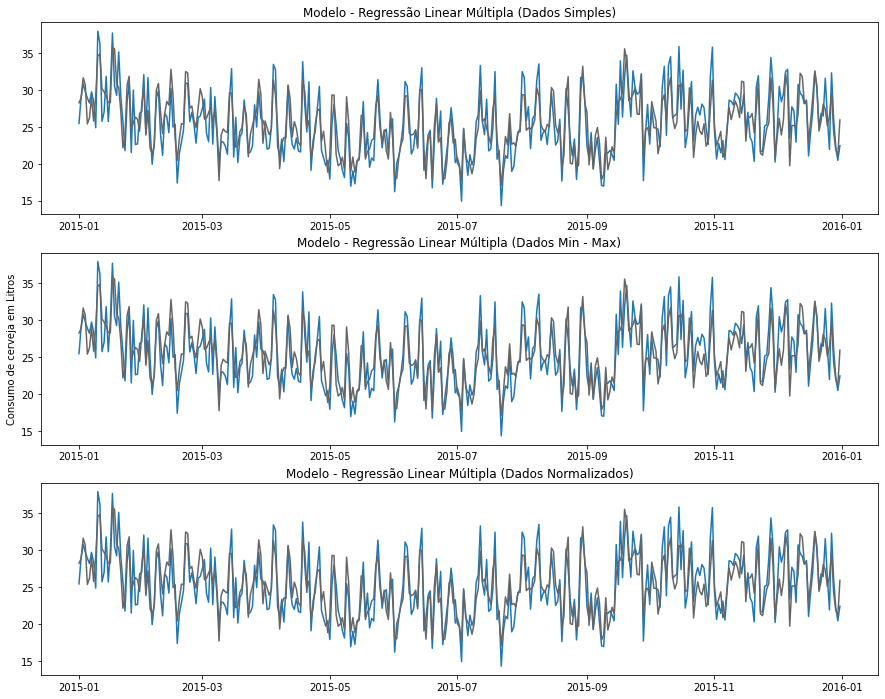

In [ ]:
plt.figure(figsize=(15,12))

color_blue = 'cornflowerblue'
# Visualização do consumo durante todo o ano
plt.subplot(3,1,1)
plt.plot_date(x='data',y='consumo_real',data=df,fmt='-')
plt.plot_date(x='data',y='consumo_previsto',data=df,fmt='-',color='#666666')
plt.title('Modelo - Regressão Linear Múltipla (Dados Simples)')

color_blue = 'cornflowerblue'
# Visualização do consumo durante todo o ano
plt.subplot(3,1,2)
plt.plot_date(x='data',y='consumo_real',data=df_min_max,fmt='-')
plt.plot_date(x='data',y='consumo_previsto',data=df_min_max,fmt='-',color='#666666')
plt.title('Modelo - Regressão Linear Múltipla (Dados Min - Max)')
plt.ylabel('Consumo de cerveja em Litros')

color_blue = 'cornflowerblue'
# Visualização do consumo durante todo o ano
plt.subplot(3,1,3)
plt.plot_date(x='data',y='consumo_real',data=df_norm,fmt='-')
plt.plot_date(x='data',y='consumo_previsto',data=df_min_max,fmt='-',color='#666666')
plt.title('Modelo - Regressão Linear Múltipla (Dados Normalizados)')

plt.show()


In [ ]:
df['dif1'] = df['consumo_previsto'] - df_min_max['consumo_previsto']
df['dif2'] = df['consumo_previsto'] - df_norm['consumo_previsto']
df.sort_values(by='dif1',ascending=True)

,data,temp_med,temp_min,temp_max,precipitacao,fimsemana,consumo_real,consumo_previsto,dif1,dif2
285,2015-10-13,21.40,18.1,27.6,2.4,0,26.523,24.769520,-3.552714e-15,3.552714e-15
139,2015-05-20,18.74,15.9,23.3,0.2,0,19.525,21.984927,-3.552714e-15,0.000000e+00
320,2015-11-17,21.76,17.7,29.7,0.0,0,26.964,26.324817,-3.552714e-15,0.000000e+00
95,2015-04-06,21.36,18.5,27.7,0.0,0,22.356,24.952580,-3.552714e-15,3.552714e-15
27,2015-01-28,25.68,20.1,29.9,4.9,0,22.603,26.305310,-3.552714e-15,3.552714e-15
...,...,...,...,...,...,...,...,...,...,...
254,2015-09-12,14.00,12.8,15.6,27.6,1,21.814,20.421057,1.065814e-14,7.105427e-15
305,2015-11-02,21.82,18.3,27.2,39.6,0,20.648,22.458343,1.065814e-14,1.065814e-14
340,2015-12-07,20.04,18.0,23.9,47.8,0,23.375,19.738327,1.065814e-14,1.421085e-14
47,2015-02-17,22.76,19.7,28.0,85.3,0,17.399,20.455184,1.421085e-14,1.776357e-14
